
# 遗传算法(Genetic Algorithm)

## 1. 遗传算法的核心思想与生物学类比

遗传算法的设计完全映射了生物进化的核心机制

|生物学概念|遗传算法对应概念|核心作用|
|:-|:-|:-|
|生物种群(population)|解的集合(一组候选解)|算法的操作对象，包含多个潜在解，避免单一解陷入局部最优|
|染色体(chromosome)|单个解的编码(如二进制串、实数向量)|承载“遗传信息”，即解的具体数值或特征|
|基因(gene)|染色体的基本单位(编码的单个位/分量)|决定解的局部特征，如二进制串中的某一位、实数向量中的某一个参数|
|基因型(genotype)|解的编码形式(如二进制串)|算法内部处理的“解的表现形式”，与“表现型”对应|
|表现型(phenotype)|解的实际数值(如十进制数)|基因型解码得到的、可直接代入问题计算的“实际解”|
|适应度(fitness)|解的优劣评价指标|衡量个体(解)的“生存能力”，是选择操作的核心依据|
|自然选择(natural selection)|选择操作(selection)|保留适应度高的个体，淘汰适应度低的个体，实现“适者生存”|
|基因重组(recombination)|交叉操作(crossover)|两个个体交换部分基因，生成新个体，实现“基因多样性”，探索新的解空间|
|基因突变(mutation)|变异操作(mutation)|随机改变个体的某个基因，避免种群陷入局部最优，维持“进化活力”|

## 2.遗传算法的核心概念解析

### 1.编码(encoding)：将“解”转化为“染色体”

- 二进制编码：

缺点：对高维或高精度问题，编码长度过长，易产生“汉明悬崖”(Hamming Cliff)
    
汉明悬崖是二进制编码的一个缺点，就是在某些相邻整数的二进制之间有很大的汉明距离(Hamming Distance)，使得遗传算法的交叉和突变都难以跨越。在信息论中，两个等长字符串之间的汉明距离是两个两个字符串对应位置的不同字符的个数。换句话说，他就是将一个字符串变换成另外一个字符串所需要替换的字符个数。例如，1011101与1001001之间的汉明距离是2

- 实数编码：

缺点：劣势：交叉、变异操作需要设计实数域的规则(如模拟二进制交叉SBX)

SBX算子是一种模拟单点二进制交叉的交叉算子。主要用于实码编码的多目标进化算法中。假设两个父代个体$\textbf{x}^1(x^1_1,\cdots,x^1_n)$和$\textbf{x}^2(x^2_1,\cdots,x^2_n)$，则使用SBX算子产生的两个后代个体$\textbf{c}^1(c^1_1,\cdots,c^1_n)$和$\textbf{c}^2(c^2_1,\cdots,c^2_n)$可以通过以下公式计算得到：
$$
\begin{cases}
c^1_i&=0.5\times [(1+\beta)\cdot x^1_i+(1-\beta)\cdot x^2_i] \\
c^2_i&=0.5\times [(1-\beta)\cdot x^1_i+(1+\beta)\cdot x^2_i]
\end{cases}
$$
其中$\beta$是用分布因子$\eta$按照以下公式动态随机决定：
$$
\beta=
\begin{cases}
(rand\times 2)^{1/(1+\eta)}, & rand \geq 0.5 \\
(1/(2-rand\times 2))^{1/(1+\eta)}, & \text{otherwise}
\end{cases}
$$
$\eta$是一个自定义的参数，$\eta$越大则产生的后代个体逼近父代个体的概率越大。所有SBX算子在局部优化搜索上表现较佳，针对处理高维目标优化问题时个体空间稀疏性的挑战有较好的效果。

### 2.适应度函数(Fitness Function)　
要求：

1. 非负性
2. 单调性：解的质量越好，适应度越大
3. 计算高效性：避免复杂运算

### 3. 种群规模(Population Size)：控制解的多样性
种群规模是初始种群中个体的数量，其选择需平衡“多样性”与“计算效率”：

- 规模过小：种群多样性不足，易陷入局部最优(类比生物种群基因单一，难以适应环境变化)；
- 规模过大：计算量激增(每个个体需计算适应度，参与交叉变异)，算法收敛速度慢。

通常根据问题的复杂度设置为20~200，复杂问题(如高维优化)可适当增大。

## 3. 遗传算法的基本流程

1. 初始化种群

示例：若用二进制编码优化$x \in [0,15]$，编码长度为4(因为$2^4=16覆盖0-15$)，种群规模$N=4$，则初始化种群可能为：个体1：0101(解码为5)；个体2：1010(解码为10)；个体3：0011(解码为3)；个体4：1100(解码为12)

2. 计算适应度

将每个个体的“基因型”解码为“表现型”(实际解)，代入适应度函数计算值

3. 选择操作

##### 轮盘赌选择(Roulette Wheel Selection)

将每个个体的适应度占总适应度的比例作为“被选中概率”，类比轮盘的扇区大小(适应度越高，扇区越大，被选中概率越高)。

##### 锦标赛选择(Tournament Selection)

随机从种群中选k个个体(k为锦标赛规模，通常取2~5)，选择其中适应度最高的个体进入下一代。(优势：避免轮盘赌中个别适应度极高的个体垄断选择，保持种群多样性)


4. 交叉操作

- 目的：模拟基因重组，生成“子代”个体，探索新的解空间
- 关键参数：交叉概率($P_c$)：控制交叉操作的频率(通常取0.6~0.9)，$P_c$过高可能破坏优质个体，过低则收敛慢

##### 单点交叉(Single-Point Crossover)

对两个亲本，随机选择一个交叉点，交换交叉点后的基因生成子代

##### 两点交叉(Two-Point Crossover)

选择两个交叉点，交换两点间的基因，适用于长编码，能更好地保留亲本的局部特征

##### 均匀交叉(Uniform Crossover)

对每个基因位读里决定是否交换(如随机生成0/1 1表示交换 0表示保留)，适合需要精细调整的问题

5. 变异操作

- 目的：模拟基因突变，避免种群陷入局部最优(若仅交叉，种群基因会逐渐趋同，无法探索新区域)

- 关键参数：变异概率($P_m$)：控制变异概率(通常取0.001~0.05)，$P_m$过高会导致算法退化为随机搜索；过低则无法打破局部最优

二进制编码：将基因位的0变为1或1变为0

实数编码：将基因值进行小幅随机扰动

6. 判断终止条件

- 迭代次数达到上限
- 最优适应度收敛
- 找到满意解

## 4. 示例

优化函数
$$
f(x)=-x^2+10x+20\text{ }(x\in [0,10])
$$


迭代完成
最优x值：4.995112414467253
最优函数值：44.999976111507664


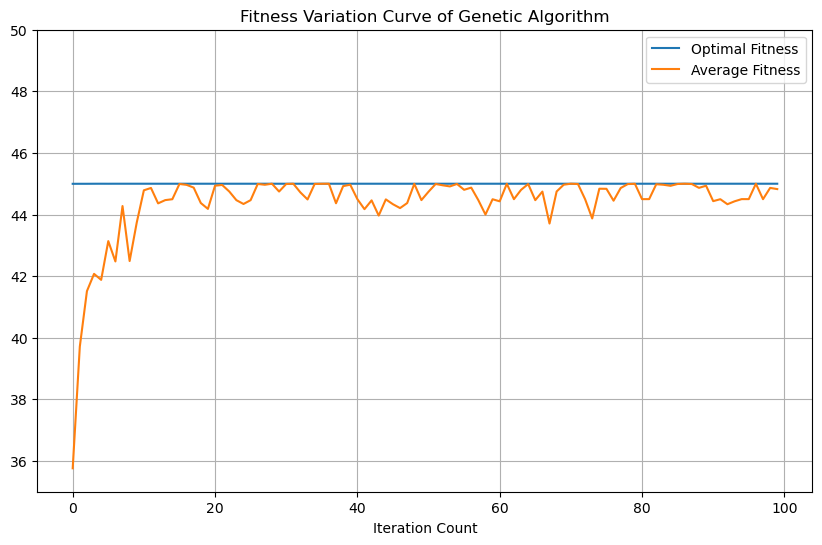

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

def target_func(x):
    target = -x**2 + 10 * x + 20
    return target

def init_pop(pop_size, chromosome_length):
    initialize_population = np.random.randint(0, 2, size = (pop_size, chromosome_length))
    return initialize_population

def decode_chromosome(chromosome, x_min, x_max):
    int_x = 0
    for i in range(len(chromosome)):
        int_x += chromosome[i] * (2**(len(chromosome) - i - 1))
    max_int = 2**len(chromosome) - 1
    x = x_min + (x_max - x_min) * int_x / max_int
    return x

def fitness_func(population, x_min, x_max):
    fitness = []
    for chromosome in population:
        x = decode_chromosome(chromosome, x_min, x_max)
        fitness.append(target_func(x))
    return np.array(fitness)

def selection(population, fitness, tournament_size=2):
    pop_size = population.shape[0] 
    new_population = [] 
    for i in range(pop_size):
        indices = np.random.choice(pop_size, size=tournament_size, replace=False)
        best_idx = indices[np.argmax(fitness[indices])]
        new_population.append(population[best_idx])

    return np.array(new_population)

def crossover(population, crossover_rate=0.8):
    pop_size = population.shape[0]
    chromosome_length = population.shape[1]
    new_population = []

    for i in range(0, pop_size, 2):
        parent1 = population[i].copy()
        parent2 = population[i + 1].copy() if i + 1 < pop_size else parent1.copy()

        if random.random() < crossover_rate and i + 1 < pop_size:
            cross_point = np.random.randint(1, chromosome_length - 1)
            parent1[cross_point:], parent2[cross_point:] = parent2[cross_point:].copy(), parent1[cross_point:].copy()

        new_population.append(parent1)
        if i + 1 < pop_size:
            new_population.append(parent2)

    return np.array(new_population)

def mutate(population, mutation_rate=0.01):
    pop_size = population.shape[0]
    new_population = population.copy()
    chromosome_length = population.shape[1]
    for i in range(pop_size):
        for j in range(chromosome_length):
            if random.random() < mutation_rate:
                new_population[i][j] = 1 - population[i][j]

    return np.array(new_population)

def genetic_algorithm(x_min=0, x_max=10, pop_size=50, chrom_length=10, crossover_rate=0.8, mutation_rate=0.01, max_generations=1000):
    population = init_pop(pop_size, chrom_length)
    best_fitness_history = []   
    avg_fitness_history = []    

    for i in range(max_generations):
        fitness = fitness_func(population, x_min, x_max)
        best_fitness = np.max(fitness)
        avg_fitness = np.mean(fitness)
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)

        if (i + 1) % 5 == 0:
            best_idx = np.argmax(fitness)
            best_x = decode_chromosome(population[best_idx],x_min, x_max)
            #print(f"第{i + 1}代 | 最优x: {best_x} | 最优适应度{best_fitness} | 平均适应度{avg_fitness}")

        population = selection(population, fitness, tournament_size=2)
        population = crossover(population, crossover_rate)
        population = mutate(population, mutation_rate)

    final_fitness = fitness_func(population, x_min, x_max)
    best_idx = np.argmax(final_fitness)
    best_x = decode_chromosome(population[best_idx],x_min, x_max)
    best_fitness = np.max(final_fitness)

    print("\n迭代完成")
    print(f"最优x值：{best_x}")
    print(f"最优函数值：{best_fitness}")

    plt.figure(figsize=(10, 6))
    plt.plot(best_fitness_history, label="Optimal Fitness")
    plt.plot(avg_fitness_history, label="Average Fitness")
    plt.xlabel("Iteration Count")
    plt.ylim(35, 50)
    plt.legend("Fitness")
    plt.title("Fitness Variation Curve of Genetic Algorithm")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    genetic_algorithm(
        x_min=0, x_max=10, pop_size=50, chrom_length=10,crossover_rate=0.8, mutation_rate=0.01, max_generations=100
    )